# Issue

In [1]:
import rasterio as rst
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np

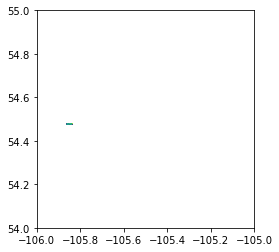

<AxesSubplot:>

In [2]:
fp = r'Classifier1_moja.tiff'
img = rst.open(fp)
show(img)

In [3]:
img.bounds

BoundingBox(left=-106.0, bottom=54.0, right=-105.0, top=55.0)

In [4]:
img.indexes

(1,)

Issue :   A lot of padding around the area of interest.

Task  :   Clip a raster to the area of interest.

# Finding geometry for a mask

rasterio.features.dataset_features documentation:
https://rasterio.readthedocs.io/en/latest/api/rasterio.features.html#rasterio.features.dataset_features

In [5]:
from rasterio.features import dataset_features

In [6]:
# dataset_features yields GeoJSON-like Feature dictionaries for shapes found in the given band
geom_gen = dataset_features(img, bidx=1)

In [7]:
# get bounding boxes from all shapes
bboxes = [geom['bbox'] for geom in geom_gen]

In [8]:
bboxes

[[-105.84875, 54.48625, -105.8485, 54.4865],
 [-105.84725, 54.47775, -105.83225, 54.48775],
 [-105.873, 54.47575, -105.84875, 54.48625],
 [-105.85275, 54.47475, -105.84275, 54.48675],
 [-105.864, 54.47375, -105.84925, 54.482],
 [-105.84725, 54.4745, -105.83175, 54.4825],
 [-105.871, 54.471, -105.85875, 54.47925],
 [-105.84375, 54.469, -105.82925, 54.48025],
 [-105.86975, 54.46675, -105.8535, 54.4755],
 [-105.861, 54.4675, -105.84025, 54.476],
 [-105.86125, 54.46725, -105.861, 54.4675]]

In [9]:
# get extremums from the bounding boxes
left   = min([bbox[0] for bbox in bboxes])
bottom = min([bbox[1] for bbox in bboxes])
right  = max([bbox[2] for bbox in bboxes])
top    = max([bbox[3] for bbox in bboxes])

In [10]:
from shapely.geometry import box

# create a POLYGON geometry for the mask
geom = box(left, bottom, right, top)
geom.wkt

'POLYGON ((-105.82925 54.46675, -105.82925 54.48775, -105.873 54.48775, -105.873 54.46675, -105.82925 54.46675))'

# Masking

In [11]:
from rasterio.mask import mask

In [12]:
# data for a clipped image
out_image, out_transform = mask(img, [geom], crop=True, pad=True)
out_meta = img.meta

In [13]:
# save clipped image in a new file
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rst.open(r'Classifier1_moja_masked.tiff', 'w', **out_meta) as dest:
    dest.write(out_image)

# Check

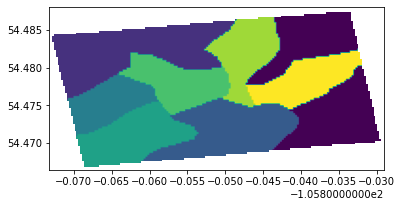

<AxesSubplot:>

In [14]:
fp_result = r'Classifier1_moja_masked.tiff'
result = rst.open(fp_result)
show(result)